## Multiple linear regression using Hilbert transform

Written by Abirlal Metya, Panini Dasgupta, Manmeet Singh (25/12/2019)

import modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import hilbert, chirp
import hilbert_data1_panini_20CRV33
import datetime


import statsmodels.api as sm

Read Data

In [2]:
x_train,y_train,_ = hilbert_data1_panini_20CRV33.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test,y_test,_ = hilbert_data1_panini_20CRV33.data_hilbert(datetime.datetime(2009,1,1),datetime.datetime(2015,12,31))


In [3]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape


((10839, 36), (10839, 1), (2437, 36), (2437, 1))

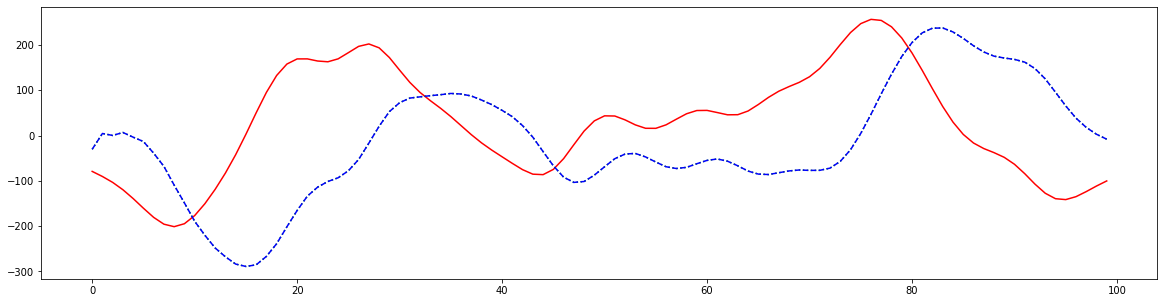

In [4]:
import matplotlib.pyplot as plt#plot the first image in the dataset
from scipy.signal import hilbert
plt.figure(figsize=[20,5])
#plt.imshow(xtrain[1,:,:,0])
plt.plot(np.arange(100),x_train.iloc[0:100,0],'-r')
plt.plot(np.arange(100),np.imag(hilbert(x_train.iloc[:,0])[0:100]),':g')
plt.plot(np.arange(100),x_train.iloc[0:100,12],'--b')

/home/cccr/supriyo/.conda/envs/knp_ai/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


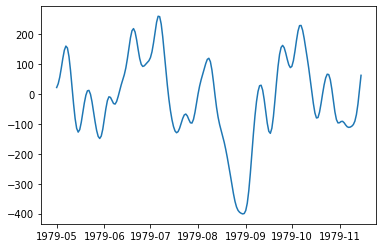

In [5]:
plt.plot(x_train.iloc[1:200,2])

In [6]:
from sklearn import linear_model

In [7]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train.values,y_train.values)

In [8]:
predictions = lm.predict(x_test.values)

In [9]:
predictions.shape

(2437, 1)

In [10]:
(lm.score(x_train.values,y_train.values))**0.5

0.8545954021899305

In [11]:
np.corrcoef(predictions[:,0],y_test.values[:,0])

array([[1.        , 0.81458497],
       [0.81458497, 1.        ]])

Plot different columns

In [12]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) # make the predictions by the model

# model.summary()

In [13]:
x_test3 = hilbert_data1_panini_20CRV33.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))
predictions_test = lm.predict(x_test3.values)
predict_tot = predictions_test#/predictions.std()
rmm1_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm1_predict.to_csv('rmm1_MLR_36.txt')

# MLP

In [14]:
from sklearn.preprocessing import MinMaxScaler

sc3 = MinMaxScaler()
sc5 = MinMaxScaler()

sc5.fit(x_train[:])

#test_x3 =  sc5.transform(x_test3[:])
train_x = sc5.transform(x_train[:])
test_x  = sc5.transform(x_test[:])


sc3.fit(y_train[:])

train_y = sc3.transform(y_train)
test_y  = sc3.transform(y_test)

train_x.max(),test_x.max(),train_y.max(),test_y.max()

from keras.models import Sequential
from keras.layers import Dense,Dropout

# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=36, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam')

history = model.fit(train_x, train_y, validation_data=(test_x,test_y),epochs=30, batch_size=10)

Using TensorFlow backend.


Train on 10839 samples, validate on 2437 samples
Epoch 1/30
10839/10839 [==============================] - 2s 191us/step - loss: 0.1050 - val_loss: 0.0929
Epoch 2/30
10839/10839 [==============================] - 2s 161us/step - loss: 0.0754 - val_loss: 0.0640
Epoch 3/30
10839/10839 [==============================] - 2s 157us/step - loss: 0.0698 - val_loss: 0.0626
Epoch 4/30
10839/10839 [==============================] - 2s 158us/step - loss: 0.0684 - val_loss: 0.0623
Epoch 5/30
10839/10839 [==============================] - 2s 161us/step - loss: 0.0672 - val_loss: 0.0599
Epoch 6/30
10839/10839 [==============================] - 2s 160us/step - loss: 0.0661 - val_loss: 0.0611
Epoch 7/30
10839/10839 [==============================] - 2s 159us/step - loss: 0.0653 - val_loss: 0.0612
Epoch 8/30
10839/10839 [==============================] - 2s 155us/step - loss: 0.0650 - val_loss: 0.0616
Epoch 9/30
10839/10839 [==============================] - 2s 156us/step - loss: 0.0636 - val_loss: 0.05

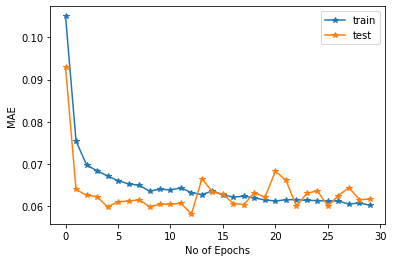

In [15]:
plt.plot(history.history['loss'],'-*',label ='train')
plt.plot(history.history['val_loss'],'-*',label ='test')
plt.ylabel('MAE')
plt.xlabel('No of Epochs')
plt.legend()

training shape = 
(10839, 1)


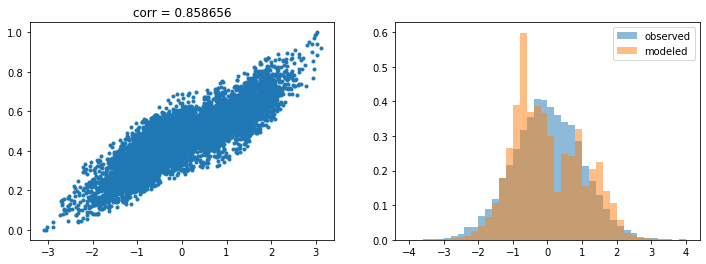

In [16]:
predict1   = model.predict(train_x)
yy_train   = sc3.inverse_transform(predict1)
yy_train   = yy_train/yy_train.std()
train_corr = np.corrcoef(yy_train[:,0],train_y[:,0])[0,1]

print("training shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train[:,0],train_y,'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.rmm1,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

In [17]:
test_x.shape

(2437, 36)

test shape = 
(2437, 1)


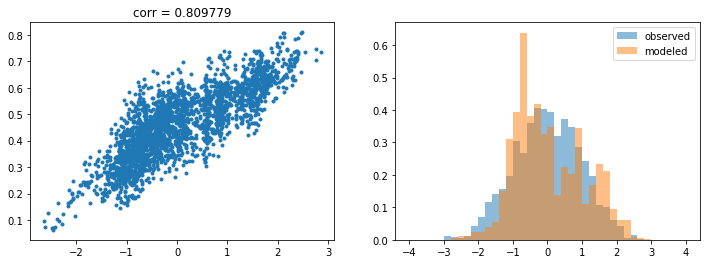

In [18]:
predict2  = model.predict(test_x)
yy_test   = sc3.inverse_transform(predict2)
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm1,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

## RMM2

In [19]:
x_train,_,y_train = hilbert_data1_panini_20CRV33.data_hilbert(datetime.datetime(1979,1,1),datetime.datetime(2008,12,31))
x_test,_,y_test = hilbert_data1_panini_20CRV33.data_hilbert(datetime.datetime(2009,1,1),datetime.datetime(2015,12,31))


In [20]:
lm = linear_model.LinearRegression()
model = lm.fit(x_train.values,y_train.values)

In [21]:
predictions = lm.predict(x_test.values)

In [22]:
(lm.score(x_train.values,y_train.values))**0.5

0.8546598672417317

In [23]:
np.corrcoef(predictions[:,0],y_test.values[:,0])

array([[1.        , 0.82092188],
       [0.82092188, 1.        ]])

In [24]:
model = sm.OLS(y_train, x_train).fit()
predictions = model.predict(x_train) # make the predictions by the model

# model.summary()

In [25]:
x_test3 = hilbert_data1_panini_20CRV33.data_pres(datetime.datetime(1905,1,1),datetime.datetime(2015,12,31))
predictions_test = lm.predict(x_test3.values)
predict_tot = predictions_test#/predictions.std()
rmm2_predict = pd.DataFrame(predict_tot,index=x_test3.index)
rmm2_predict.to_csv('rmm2_MLR_36.txt')

In [26]:
from sklearn.preprocessing import MinMaxScaler

sc3 = MinMaxScaler()
sc5 = MinMaxScaler()

sc5.fit(x_train[:])

#test_x3 =  sc5.transform(x_test3[:])
train_x = sc5.transform(x_train[:])
test_x  = sc5.transform(x_test[:])


sc3.fit(y_train[:])

train_y = sc3.transform(y_train)
test_y  = sc3.transform(y_test)

train_x.max(),test_x.max(),train_y.max(),test_y.max()

from keras.models import Sequential
from keras.layers import Dense,Dropout

# define the keras model
model = Sequential()
model.add(Dense(100, input_dim=36, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(loss='mae', optimizer='adam')

history = model.fit(train_x, train_y, validation_data=(test_x,test_y),epochs=30, batch_size=10)

Train on 10839 samples, validate on 2437 samples
Epoch 1/30
10839/10839 [==============================] - 2s 180us/step - loss: 0.1103 - val_loss: 0.0823
Epoch 2/30
10839/10839 [==============================] - 1s 137us/step - loss: 0.0839 - val_loss: 0.0735
Epoch 3/30
10839/10839 [==============================] - 2s 139us/step - loss: 0.0778 - val_loss: 0.0700
Epoch 4/30
10839/10839 [==============================] - 2s 143us/step - loss: 0.0759 - val_loss: 0.0702
Epoch 5/30
10839/10839 [==============================] - 2s 143us/step - loss: 0.0751 - val_loss: 0.0685
Epoch 6/30
10839/10839 [==============================] - 2s 146us/step - loss: 0.0737 - val_loss: 0.0725
Epoch 7/30
10839/10839 [==============================] - 2s 142us/step - loss: 0.0730 - val_loss: 0.0704
Epoch 8/30
10839/10839 [==============================] - 2s 139us/step - loss: 0.0721 - val_loss: 0.0693
Epoch 9/30
10839/10839 [==============================] - 1s 138us/step - loss: 0.0719 - val_loss: 0.06

training shape = 
(10839, 1)


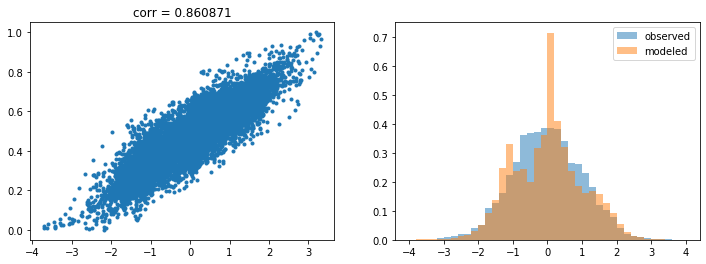

In [27]:
predict1   = model.predict(train_x)
yy_train   = sc3.inverse_transform(predict1)
yy_train   = yy_train/yy_train.std()
train_corr = np.corrcoef(yy_train[:,0],train_y[:,0])[0,1]

print("training shape = ");print(predict1.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_train[:,0],train_y,'.')

ax[0].set_title('corr = %f'%train_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_train.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_train,bins,density=True,alpha=0.5,label='modeled');
plt.legend()

test shape = 
(2437, 1)


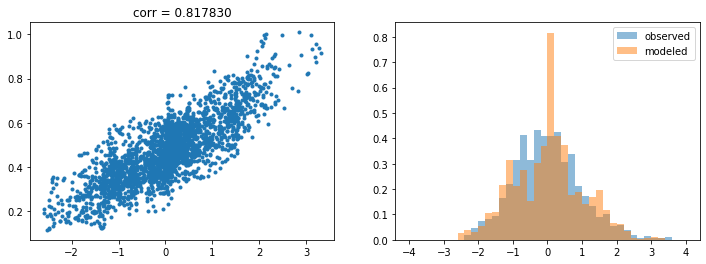

In [28]:
predict2  = model.predict(test_x)
yy_test   = sc3.inverse_transform(predict2)
yy_test   = yy_test/yy_test.std()
test_corr = np.corrcoef(yy_test[:,0],test_y[:,0])[0,1]

print("test shape = ");print(predict2.shape)

fig,ax = plt.subplots(1,2,figsize = (12,4))

ax[0].plot(yy_test[:,0],test_y,'.')

ax[0].set_title('corr = %f'%test_corr)

bins = np.linspace(-4.0,4.0,41)

ax[1].hist(y_test.rmm2,bins,density=True,alpha=0.5,label='observed')
ax[1].hist(yy_test,bins,density=True,alpha=0.5,label='modeled');
plt.legend()